# Solving the n-Queens Problem using Local Search

## Instructions

Total Points: Undergrads 100 / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a PDF file. 


## The n-Queens Problem

* __Goal:__ Find an arrangement of $n$ queens on a $n \times n$ chess board so that no queen is on the same row, column or diagonal as any other queen.

* __State space:__ An arrangement of the queens on the board. We restrict the state space to arrangements where there is only a single queen per column. We represent a state as an integer vector $\mathbf{q} = \{q_1, q_2, \dots, q_n\}$, each number representing the row positions of the queens from left to right. We will call a state a "board."

* __Objective function:__ The number of pairwise conflicts (i.e., two queens in the same row/column/diagonal).
The optimization problem is to find the optimal arrangement $\mathbf{q}^*$ of $n$ queens on the board can be written as:

  > minimize: $\mathrm{conflicts}(\mathbf{q})$
  >
  > subject to: $\mathbf{q} \ \text{contains only one queen per column}$

  Note: the constraint (subject to) is enforced by the definition of the state space.

* __Local improvement move:__ Move one queen to a different row in its column.

* __Termination:__ For this problem there is always an arrangement $\mathbf{q}^*$ with $\mathrm{conflicts}(\mathbf{q}^*) = 0$, however, the local improvement moves might end up in a local minimum. 

## Helper functions

In [8]:
import numpy as np
import random
import matplotlib.pyplot as plt
import time
from matplotlib import colors



def random_board(n):
    """Creates a random board of size n x n. Note that only a single queen is placed in each column!"""
    
    return(np.random.randint(0,n, size = n))

def comb2(n): return n*(n-1)//2 # this is n choose 2 equivalent to math.comb(n, 2); // is int division

def conflicts(board):
    """Caclulate the number of conflicts, i.e., the objective function."""

    n = len(board)
    
    horizontal_cnt = [0] * n
    diagonal1_cnt = [0] * 2 * n
    diagonal2_cnt = [0] * 2 * n
    
    for i in range(n):
        horizontal_cnt[board[i]] += 1
        diagonal1_cnt[i + board[i]] += 1
        diagonal2_cnt[i - board[i] + n] += 1
    
    return sum(map(comb2, horizontal_cnt + diagonal1_cnt + diagonal2_cnt))


def show_board(board, cols = ['white', 'gray'], fontsize = 48):  
    """display the board"""
    
    n = len(board)
    
    # create chess board display
    display = np.zeros([n,n])
    for i in range(n):
        for j in range(n):
            if (((i+j) % 2) != 0): 
                display[i,j] = 1
    
    cmap = colors.ListedColormap(cols)
    fig, ax = plt.subplots()
    ax.imshow(display, cmap = cmap, 
              norm = colors.BoundaryNorm(range(len(cols)+1), cmap.N))
    ax.set_xticks([])
    ax.set_yticks([])
    
    # place queens. Note: Unicode u265B is a black queen
    for j in range(n):
        plt.text(j, board[j], u"\u265B", fontsize = fontsize, 
                 horizontalalignment = 'center',
                 verticalalignment = 'center')
    
    print(f"Board with {conflicts(board)} conflicts.")
    plt.show()

## Create a board

Board with 8 conflicts.


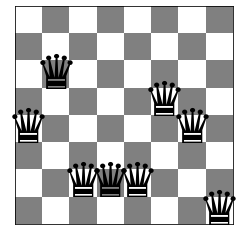

Queens (left to right) are at rows: [4 2 6 6 6 3 4 7]
Number of conflicts: 8


In [9]:
size = 8
board = random_board(size)

show_board(board)
print(f"Queens (left to right) are at rows: {board}")
print(f"Number of conflicts: {conflicts(board)}")

A board $4 \times 4$ with no conflicts:

Board with 0 conflicts.


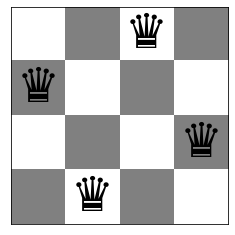

In [10]:
exp_board = [1,3,0,2]
show_board(exp_board)

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook. Sync your forked repository and pull the latest revision. 
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement inteligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formated professionally. 
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your PDF file is readable. For example, long lines are cut off in the PDF file. You don't have control over page breaks, so do not worry about these.
4. Document your code. Add a short discussion of how your implementation works and your design choices.

## Task 1: Steepest-ascend Hill Climbing Search [30 Points]

Calculate the objective function for all local moves (see definition of local moves above) and always choose the best among all local moves. If there are no local moves that improve the objective, then you have reached a local optimum. 

Board with 2 conflicts.


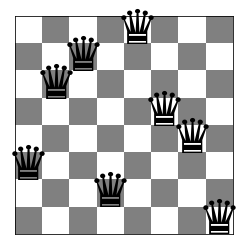

Queens (left to right) are at rows: [5 2 1 6 0 3 4 7]
Number of conflicts: 2


In [11]:
def steepest_ascend_hill_climbing(board, size):
    curr = board.copy()
    local_best = conflicts(curr)
    updated = False
    update_counter = 0

    while True:
        # try every move with conflicts
        for i in range(size):
            for j in range(size):
                # reset try_curr every time
                try_curr = curr.copy()
                try_curr[i] = j
                try_num = conflicts(try_curr)
                # print("update try_curr to:", try_curr, try_num, local_best)
                # show_board(try_curr)
                if (try_num < local_best):
                    local_best = try_num
                    updated = True
                    # print("updating curr with ", try_curr)
                    curr = try_curr
                    # print("updated curr to ", curr)
                    # show_board(curr)
                    # print("------------------------------------------------------------")
        # after looping through all options
        update_counter +=1
        if updated:
            updated = False
        else:
            # already the local best possible (could get stuck)
            # print("total run done, searches count: ", update_counter)
            return curr 

SAHC_board = steepest_ascend_hill_climbing(board, size)
show_board(SAHC_board)
print(f"Queens (left to right) are at rows: {SAHC_board}")
print(f"Number of conflicts: {conflicts(SAHC_board)}")




## Task 2: Stochastic Hill Climbing 1 [10 Points]

Chooses randomly from among all uphill moves till you have reached a local optimum.

Board with 1 conflicts.


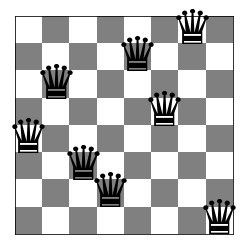

Queens (left to right) are at rows: [4 2 5 6 1 3 0 7]
Number of conflicts: 1


In [12]:
# Code and description go here
def stochastic_hill_climbing(board, size):
    curr = board.copy()
    local_best = conflicts(curr)
    updated = False
    update_counter = 0
    potential_moves=[]
    potential_moves.append(curr)
    while True:
        # try every move with conflicts
        for i in range(size):
            for j in range(size):
                # reset try_curr every time
                try_curr = curr.copy()
                try_curr[i] = j
                try_num = conflicts(try_curr)
                # print("update try_curr to:", try_curr, try_num, local_best)
                
                if try_num < local_best:
                    local_best = try_num
                    updated = True
                    # if new best appears, refill the array
                    potential_moves.clear()
                    potential_moves.append(try_curr)
                    # print("updating curr with ", try_curr)
                    
                    # print("updated curr to ", curr)
                    # show_board(curr)
                    # print("------------------------------------------------------------")
                elif try_num == local_best:
                    # if try_num equals to the current best, list it as one of the options
                    # print(try_num, " equals ", local_best, try_curr)
                    potential_moves.append(try_curr)

        # print("ij done, ", potential_moves)
        # after looping through all options
        update_counter +=1
        if updated:
            updated = False
            
            curr = random.choice(potential_moves)
            # print("random curr: ", curr)
            # temp = random.choice(potential_moves)
            # print("temp:", temp)
            # print("updated curr to ", curr)
        else:
            # already the local best possible (could get stuck)
            # print("total run done, searches count: ", update_counter)
            return curr 

SHC_board = stochastic_hill_climbing(board, size)
show_board(SHC_board)
print(f"Queens (left to right) are at rows: {SHC_board}")
print(f"Number of conflicts: {conflicts(SHC_board)}")

## Task 3: Stochastic Hill Climbing 2 [20 Points]

A popular version of stochastic hill climbing generates only a single random local neighbor at a time and accept it if it has a better objective function value than the current state. This is very efficient if each state has many possible successor states. This method is called "First-choice hill climbing" in the textbook.

__Notes:__ 

* Detecting local optima is tricky! You can, for example, stop if you were not able to improve the objective function during the last $x$ tries.

Board with 0 conflicts.


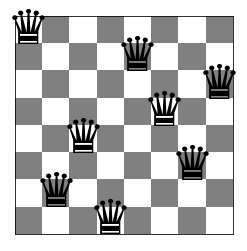

Queens (left to right) are at rows: [0 6 4 7 1 3 5 2]
Number of conflicts: 0


In [13]:

def stochastic_hill_climbing2(limit, board, size):
    temp_board = board.copy()
    # show_board(temp_board)
    for x in range(limit):
        conf = conflicts(temp_board)
        new_board = random_board(size)
        # show_board(new_board)
        temp_conf = conflicts(new_board)
        if conf > temp_conf:
            temp_board = new_board.copy()
            # print("copy")

    # print("new board generated: ", temp_board)
    # print("new board conflicts: ", conflicts(temp_board))
    # show_board(temp_board)

    curr = temp_board.copy()
    local_best = conflicts(curr)
    updated = False
    update_counter = 0
    potential_moves=[]
    potential_moves.append(curr)
    while True:
        # try every move with conflicts
        for i in range(size):
            for j in range(size):
                # reset try_curr every time
                try_curr = curr.copy()
                try_curr[i] = j
                try_num = conflicts(try_curr)
                # print("update try_curr to:", try_curr, try_num, local_best)
                
                if try_num < local_best:
                    local_best = try_num
                    updated = True
                    # if new best appears, refill the array
                    potential_moves.clear()
                    potential_moves.append(try_curr)
                    # print("updating curr with ", try_curr)
                    
                    # print("updated curr to ", curr)
                    # show_board(curr)
                    # print("------------------------------------------------------------")
                elif try_num == local_best:
                    # if try_num equals to the current best, list it as one of the options
                    # print(try_num, " equals ", local_best, try_curr)
                    potential_moves.append(try_curr)

        # print("ij done, ", potential_moves)
        # after looping through all options
        update_counter +=1
        if updated:
            updated = False
            
            curr = random.choice(potential_moves)
            # print("random curr: ", curr)
            # temp = random.choice(potential_moves)
            # print("temp:", temp)
            # print("updated curr to ", curr)
        else:
            # already the local best possible (could get stuck)
            # print("total run done, searches count: ", update_counter)
            return curr 

SHC_board2 = stochastic_hill_climbing2(10, board, size)
show_board(SHC_board2)
print(f"Queens (left to right) are at rows: {SHC_board2}")
print(f"Number of conflicts: {conflicts(SHC_board2)}")

## Task 4: Hill Climbing Search with Random Restarts [10 Points]

Hill climbing will often end up in local optima. Restart the each of the three hill climbing algorithm up to 100 times with a random board to find a better (hopefully optimal) solution. Note that restart just means to run the algoithm several times starting with a new random board.

optimal result:
Board with 0 conflicts.


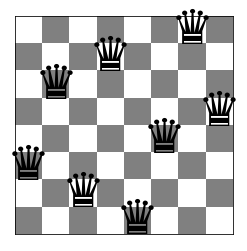

In [14]:
# Code and description go here
def random_restarts(board_size):
    optimal_board= random_board(board_size)
    optimal_num = board_size
    for x in range(100):
        new_board1 = random_board(board_size)

        temp_SAHC_board = steepest_ascend_hill_climbing(new_board1, board_size)
        temp_SAHC_board_conf = conflicts(temp_SAHC_board)
        if (conflicts(temp_SAHC_board)<optimal_num):
            optimal_board = temp_SAHC_board
            optimal_num = temp_SAHC_board_conf

        temp_SHC_board = stochastic_hill_climbing(new_board1, board_size)
        temp_SHC_board_conf = conflicts(temp_SHC_board)
        if (conflicts(temp_SAHC_board)<optimal_num):
            optimal_board = temp_SHC_board
            optimal_num = temp_SHC_board_conf

        temp_SHC_board2 = stochastic_hill_climbing2(10, new_board1, board_size)
        temp_SHC_board2_conf = conflicts(temp_SHC_board2)
        if (conflicts(temp_SAHC_board)<optimal_num):
            optimal_board = temp_SHC_board2
            optimal_num = temp_SHC_board2_conf
    
    print("optimal result:")
    show_board(optimal_board)
    
        
    

random_restarts(8)


## Task 5: Compare Performance [20 Points]

Use runtime and objective function value to compare the algorithms. 

* Use boards of different sizes to explore how the different algorithms perform. Make sure that you run the algorithms for each board size several times (at least 10 times) with different starting boards and report averages.

* How do the algorithms scale with problem size? Use tables and charts.

* What is the largest board each algorithm can solve in a reasonable amount time?

See [Profiling Python Code](../Python_Code_Examples/profiling_code.ipynb) for help about how to measure runtime in Python.

AVG runtime of 3 methods from size of 3 to 20, each ran for 20 times


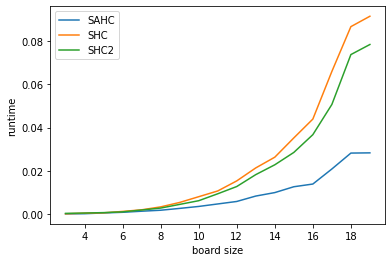

In [15]:
def compare(board_size, run):
    optimal_board= random_board(board_size)
    optimal_num = board_size

    SAHC_time_sum=0
    SHC_time_sum=0
    SHC2_time_sum=0
    SAHC_conf_sum=0
    SHC_conf_sum=0
    SHC2_conf_sum=0
    # measure total time for 3 methods 
    for x in range(run):
        new_board1 = random_board(board_size)
        t0 = time.time()
        temp_SAHC_board = steepest_ascend_hill_climbing(new_board1, board_size)
        t1 = time.time()
        SAHC_time_sum += (t1-t0)
        SAHC_conf_sum += conflicts(temp_SAHC_board)

        t2 = time.time()
        temp_SHC_board = stochastic_hill_climbing(new_board1, board_size)
        t3 = time.time()
        SHC_time_sum += (t3-t2)
        SHC_conf_sum += conflicts(temp_SHC_board)
        
        t4 = time.time()
        temp_SHC_board2 = stochastic_hill_climbing2(10, new_board1, board_size)
        t5 = time.time()
        SHC2_time_sum += (t5-t4)
        SHC2_conf_sum += conflicts(temp_SHC_board2)
    
    SAHC_time_avg= SAHC_time_sum/run
    SHC_time_avg= SHC_time_sum/run
    SHC2_time_avg= SHC2_time_sum/run
    SAHC_conf_avg= SAHC_conf_sum/run
    SHC_conf_avg= SHC_conf_sum/run
    SHC2_conf_avg= SHC2_conf_sum/run
    buff = [SAHC_time_avg, SHC_time_avg, SHC2_time_avg, SAHC_conf_avg, SHC_conf_avg, SHC2_conf_avg]
    return buff

# utilize function compare
# init containers
SAHC_time_set= []
SHC_time_set= []
SHC2_time_set= []
SAHC_conf_set=[]
SHC_conf_set=[]
SHC2_conf_set=[]
x=[]

# loop for different sizes
for i in range(3, 20):
    temp_comp = compare(i, 20)
    x.append(i)
    SAHC_time_set.append(temp_comp[0])
    SHC_time_set.append(temp_comp[1])
    SHC2_time_set.append(temp_comp[2])
    SAHC_conf_set.append(temp_comp[3])
    SHC_conf_set.append(temp_comp[4])
    SHC2_conf_set.append(temp_comp[5])


plt.plot(x, SAHC_time_set, label = "SAHC")
plt.plot(x, SHC_time_set, label = "SHC")
plt.plot(x, SHC2_time_set, label = "SHC2")
plt.xlabel("board size")
plt.ylabel("runtime")
plt.legend()
print("AVG runtime of 3 methods from size of 3 to 20, each ran for 20 times")
plt.show()

SAHC's runtime scales the best with the increase of board size.

AVG conflicts of 3 methods from size of 3 to 20, each ran for 20 times


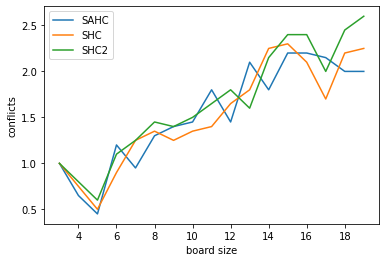

In [16]:
plt.plot(x, SAHC_conf_set, label = "SAHC")
plt.plot(x, SHC_conf_set, label = "SHC")
plt.plot(x, SHC2_conf_set, label = "SHC2")
plt.xlabel("board size")
plt.ylabel("conflicts")
plt.legend()
print("AVG conflicts of 3 methods from size of 3 to 20, each ran for 20 times")
plt.show()

There isn't a strong connection between the conflicts that three algorithms end up with when we compare them. However, the number of conflicts tend to scale up with the board size.

In [18]:
# to test the largest board each algorithm could calculate within 10 sec:
print("SAHC max board within 5 sec")
SAHC_time =0
for i in range(100, 10000):
    new_board1 = random_board(i)
    t0 = time.time()
    temp_SAHC_board = steepest_ascend_hill_climbing(new_board1, i)
    t1 = time.time()
    SAHC_time = (t1-t0)
    if SAHC_time> 5:
        print("size of ", i, " with runtime of ", SAHC_time)
        break
print("-------------------------------------------------------------")





SAHC max board within 5 sec
size of  108  with runtime of  5.066998481750488
-------------------------------------------------------------


In [19]:
print("SHC max board within 5 sec")
SHC_time=0
for i in range(100, 10000):
    new_board1 = random_board(i)
    t0 = time.time()
    temp_SHC_board = stochastic_hill_climbing(new_board1, i)
    t1 = time.time()
    SHC_time = (t1-t0)
    if SHC_time> 5:
        print("size of ", i, " with runtime of ", SHC_time)
        break
print("-------------------------------------------------------------")

SHC max board within 5 sec
size of  100  with runtime of  57.81225943565369
-------------------------------------------------------------


In [20]:
print("SHC2 max board within 5 sec")
SHC2_time =0
for i in range(100, 10000):
    new_board1 = random_board(i)
    t0 = time.time()
    temp_SHC2_board = stochastic_hill_climbing2(10, new_board1, i)
    t1 = time.time()
    SHC2_time = (t1-t0)
    if SHC2_time> 5:
        print("size of ", i, " with runtime of ", SHC_time)
        break

SHC2 max board within 5 sec
size of  100  with runtime of  57.81225943565369


## Graduate student advanced task: Simulated Annealing [10 Points]

__Undergraduate students:__ This is a bonus task you can attempt if you like [+5 Bonus Points].

Simulated annealing is a form of stochastic hill climbing that avoid local optima by also allowing downhill moves with a probability proportional to a temperature. The temperature is decreased in every iteration following an annealing schedule. You have to experiment with the annealing schedule (Google to find guidance on this).


1. Implement simulated annealing for the n-Queens problem.
2. Compare the performance with the previous algorithms. 
2. Discuss your choice of annealing schedule.

In [21]:
# Code and description go here

## More things to do

Implement a Genetic Algorithm for the n-Queens problem.

In [22]:
# Code and description go here